In [1]:
!nvidia-smi

Sun Mar  2 08:48:17 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!unzip -q /content/FlyingDrones.v5i.yolov12.zip -d /content/custom_data

In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.1/922.1 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [4]:
!wget -O /content/train_val_split.py https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py

!python train_val_split.py --datapath="/content/custom_data/train" --train_pct=0.9

--2025-03-02 08:54:02--  https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3203 (3.1K) [text/plain]
Saving to: ‘/content/train_val_split.py’

/content/train_val_ 100%[===================>]   3.13K  --.-KB/s    in 0s      

2025-03-02 08:54:02 (49.1 MB/s) - ‘/content/train_val_split.py’ saved [3203/3203]

Created folder at /content/data/train/images.
Created folder at /content/data/train/labels.
Created folder at /content/data/validation/images.
Created folder at /content/data/validation/labels.
Number of image files: 4125
Number of annotation files: 4125
Images moving to train: 3712
Images moving to validation: 413


In [8]:
import yaml
import os

def create_data_yaml(path_to_classes_txt, path_to_data_yaml):
  if not os.path.exists(path_to_classes_txt):
    print(f'classes.txt file not found! Please create a classes.txt labelmap and move it to {path_to_classes_txt}')
    return
  with open(path_to_classes_txt, 'r') as f:
    classes = []
    for line in f.readlines():
      if len(line.strip()) == 0:
        continue
      classes.append(line.strip())
  number_of_classes = len(classes)

  data = {
      'path': '/content/data',
      'train': '/content/data/train/images',
      'val': '/content/data/validation/images',
      'nc': number_of_classes,
      'names': classes
  }

  with open(path_to_data_yaml, 'w') as f:
    yaml.dump(data, f, sort_keys=False)
  print(f'Created config file at {path_to_data_yaml}')

  return
path_to_classes_txt = '/content/classes.txt'
path_to_data_yaml = '/content/data.yaml'
create_data_yaml(path_to_classes_txt, path_to_data_yaml)
print('\nFile contents:\n')
!cat /content/data.yaml

Created config file at /content/data.yaml

File contents:

path: /content/data
train: /content/data/train/images
val: /content/data/validation/images
nc: 5
names:
- Bird
- Drone
- Helicopter
- Missile
- Plane


In [9]:
!yolo detect train data=/content/data.yaml model=yolo12s.pt epochs=60 imgsz=640

Ultralytics 8.3.81 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo12s.pt, data=/content/data.yaml, epochs=60, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, 

In [10]:
!yolo detect predict model=runs/detect/train3/weights/best.pt source=data/validation/images save=True

Ultralytics 8.3.81 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 159 layers, 9,232,815 parameters, 0 gradients, 21.2 GFLOPs

image 1/413 /content/data/validation/images/00000005_jpg.rf.54e7d30395e78f89986753666926d49d.jpg: 320x640 1 Plane, 55.4ms
image 2/413 /content/data/validation/images/00000006_jpg.rf.376fcc036c37b60145b6c5eb22b8d370.jpg: 448x640 2 Missiles, 1 Plane, 63.2ms
image 3/413 /content/data/validation/images/00000011_-7-_jpg.rf.e00efa15362af2ea2a212e40636cfebc.jpg: 480x640 (no detections), 53.1ms
image 4/413 /content/data/validation/images/00000014_jpg.rf.0c9c289401416c025081da5e650fc5ee.jpg: 448x640 1 Plane, 16.0ms
image 5/413 /content/data/validation/images/00000019_jpg.rf.5df57b4e787eb332776f0a0ef05ab67c.jpg: 384x640 1 Helicopter, 53.1ms
image 6/413 /content/data/validation/images/00000019_jpg.rf.92d014b6ee499d7e77fed97821908e26.jpg: 384x640 1 Missile, 14.2ms
image 7/413 /content/data/validation/images/00000021_jpg.rf.b8f97e9a5

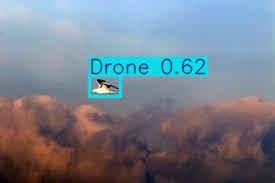

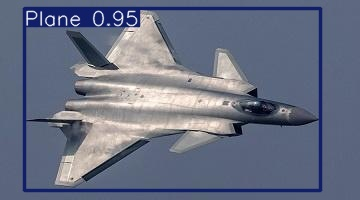

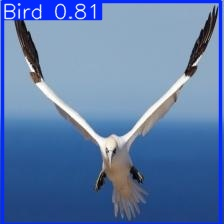

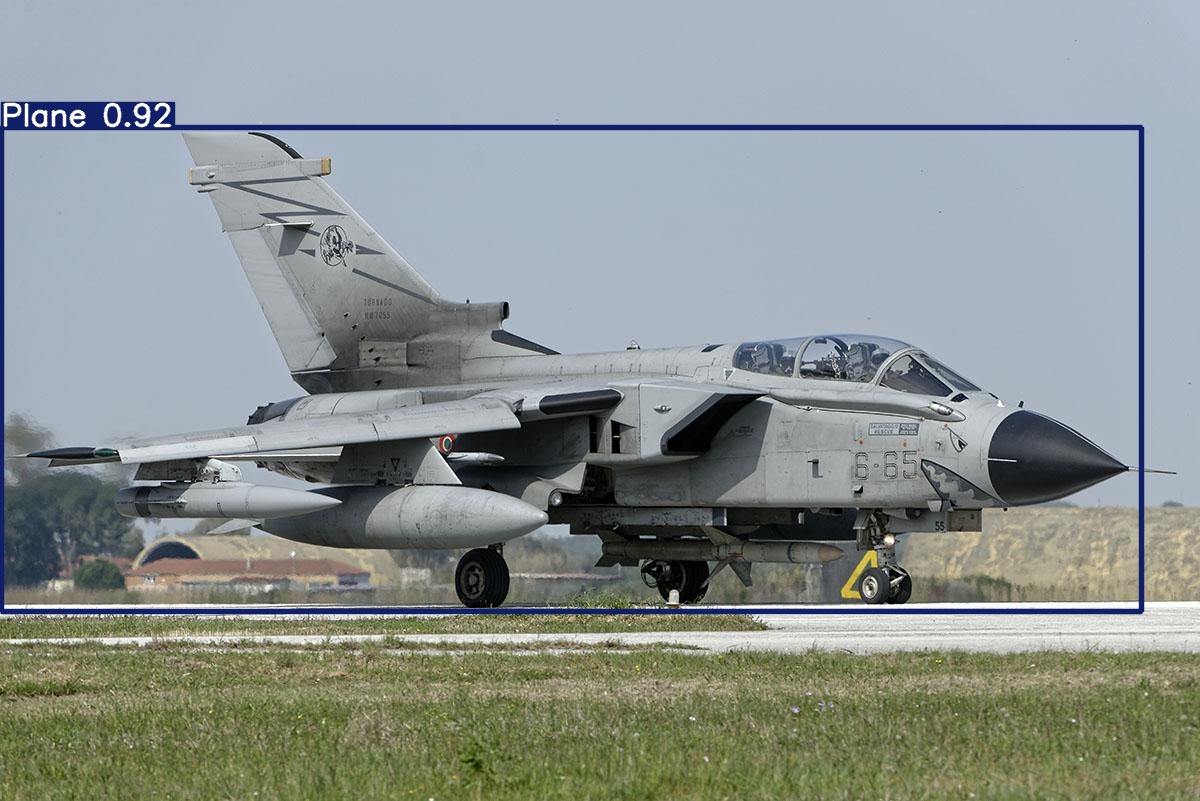

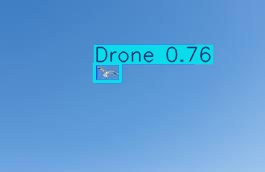

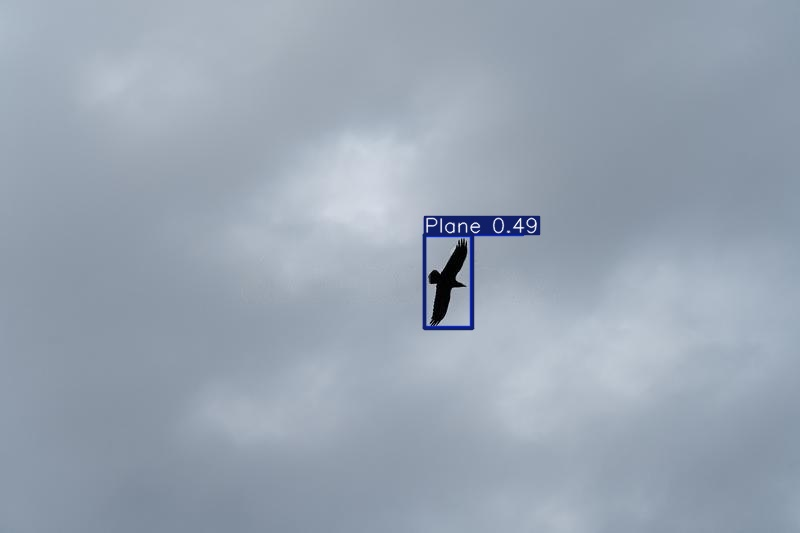

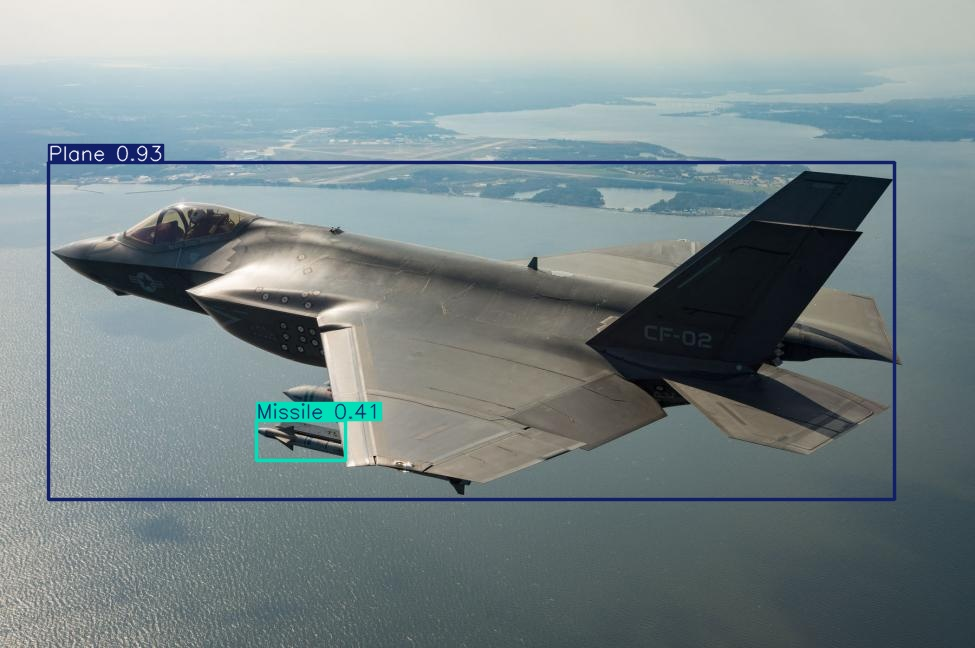

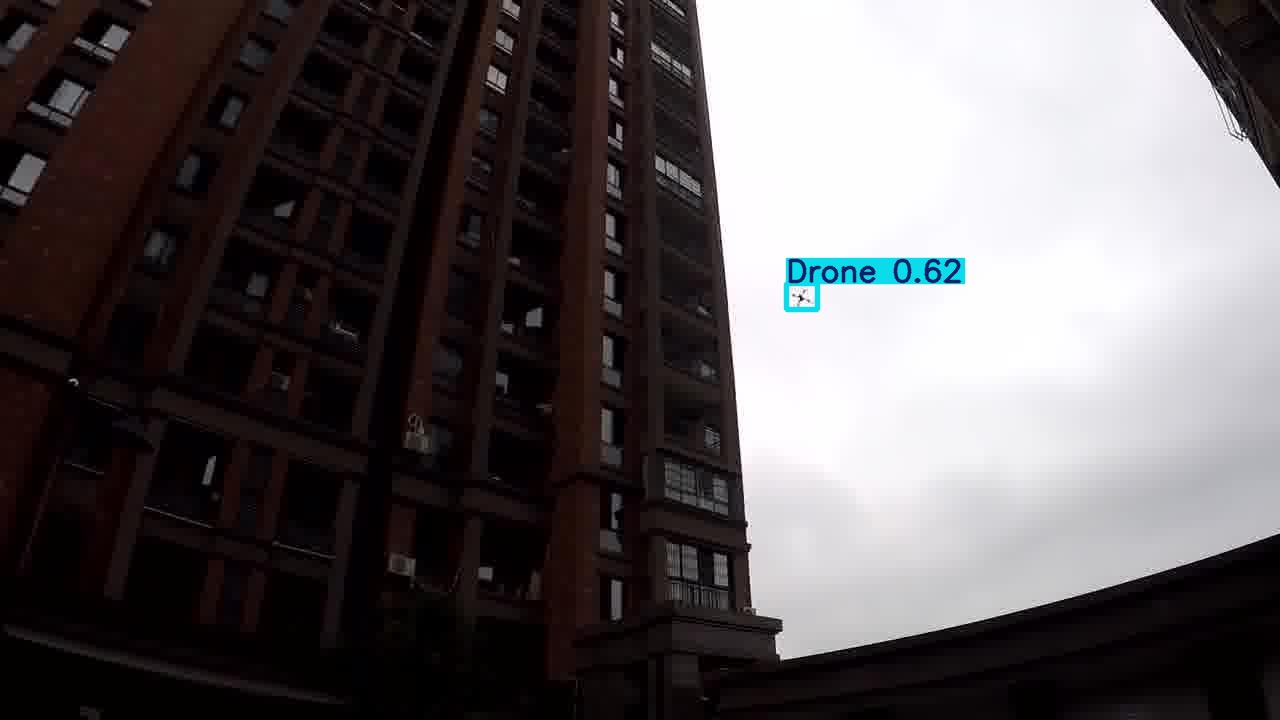

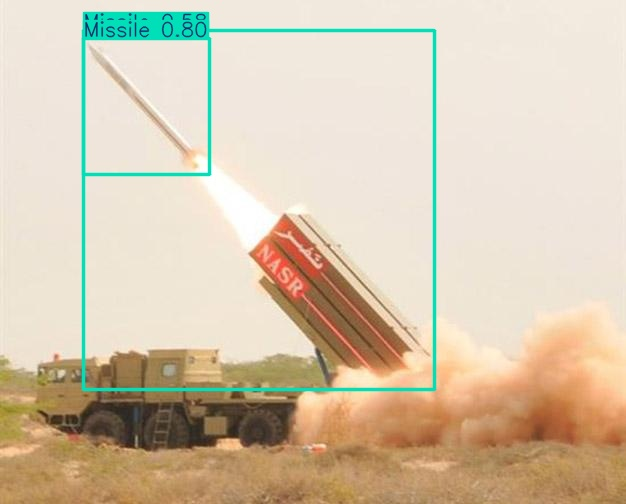

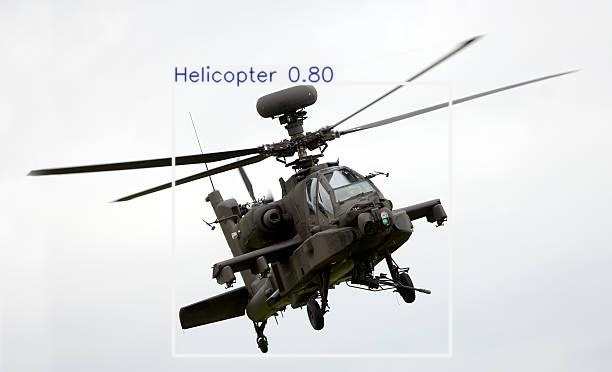

In [11]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')

In [14]:
!mkdir /content/my_model
!cp /content/runs/detect/train3/weights/best.pt /content/my_model/my_model.pt
!cp -r /content/runs/detect/train3 /content/my_model

%cd my_model
!zip /content/my_model.zip my_model.pt
!zip -r /content/my_model.zip train3
%cd /content

mkdir: cannot create directory ‘/content/my_model’: File exists
/content/my_model
updating: my_model.pt (deflated 9%)
  adding: train3/ (stored 0%)
  adding: train3/val_batch2_pred.jpg (deflated 9%)
  adding: train3/train_batch11600.jpg (deflated 15%)
  adding: train3/results.png (deflated 7%)
  adding: train3/R_curve.png (deflated 9%)
  adding: train3/train_batch11602.jpg (deflated 15%)
  adding: train3/events.out.tfevents.1740905819.00361d15b6a9.3575.0 (deflated 92%)
  adding: train3/confusion_matrix.png (deflated 27%)
  adding: train3/labels_correlogram.jpg (deflated 36%)
  adding: train3/labels.jpg (deflated 23%)
  adding: train3/weights/ (stored 0%)
  adding: train3/weights/best.pt (deflated 9%)
  adding: train3/weights/last.pt (deflated 9%)
  adding: train3/F1_curve.png (deflated 8%)
  adding: train3/P_curve.png (deflated 10%)
  adding: train3/confusion_matrix_normalized.png (deflated 24%)
  adding: train3/results.csv (deflated 61%)
  adding: train3/val_batch1_labels.jpg (deflate

In [15]:
from google.colab import files

files.download('/content/my_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>